# PCA and LDA for Visualization Demo (Clustering)

Instructor: Jeremy Eng

[Resource](https://365datascience.com/tutorials/python-tutorials/pca-k-means/)

## Outline
In this notebook, we will show how PCA is useful for visualizing clustering results.
1. [Perform KMeans clustering](#1.-Perform-KMeans-clustering)
2. [Perform PCA to visualize clusters in 2D](#2.-Perform-PCA-to-visualize-clusters-in-2D)

## 1. Perform KMeans clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['day'].value_counts())
print(df['time'].value_counts())

Male      157
Female     87
Name: sex, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64


All categorical columns are binary, except for `day`.

In [4]:
#encode categorical data
df_encoded = pd.get_dummies(df, prefix=None, columns=['day'])
df_encoded = pd.get_dummies(df_encoded, columns=['sex', 'smoker', 'time'], drop_first=True) #binary
df_encoded.head()

,total_bill,tip,size,day_Thur,day_Fri,day_Sat,day_Sun,sex_Female,smoker_No,time_Dinner
0,16.99,1.01,2,0,0,0,1,1,1,1
1,10.34,1.66,3,0,0,0,1,0,1,1
2,21.01,3.50,3,0,0,0,1,0,1,1
3,23.68,3.31,2,0,0,0,1,0,1,1
4,24.59,3.61,4,0,0,0,1,1,1,1


In [5]:
#Scale
scaler = StandardScaler().set_output(transform="pandas")
df_scaled = scaler.fit_transform(df_encoded)
df_scaled.head()

,total_bill,tip,size,day_Thur,day_Fri,day_Sat,day_Sun,sex_Female,smoker_No,time_Dinner
0,-0.314711,-1.439947,-0.600193,-0.58366,-0.290593,-0.744406,1.486784,1.343353,0.784789,0.621582
1,-1.063235,-0.969205,0.453383,-0.58366,-0.290593,-0.744406,1.486784,-0.744406,0.784789,0.621582
2,0.137780,0.363356,0.453383,-0.58366,-0.290593,-0.744406,1.486784,-0.744406,0.784789,0.621582
3,0.438315,0.225754,-0.600193,-0.58366,-0.290593,-0.744406,1.486784,-0.744406,0.784789,0.621582
4,0.540745,0.443020,1.506958,-0.58366,-0.290593,-0.744406,1.486784,1.343353,0.784789,0.621582


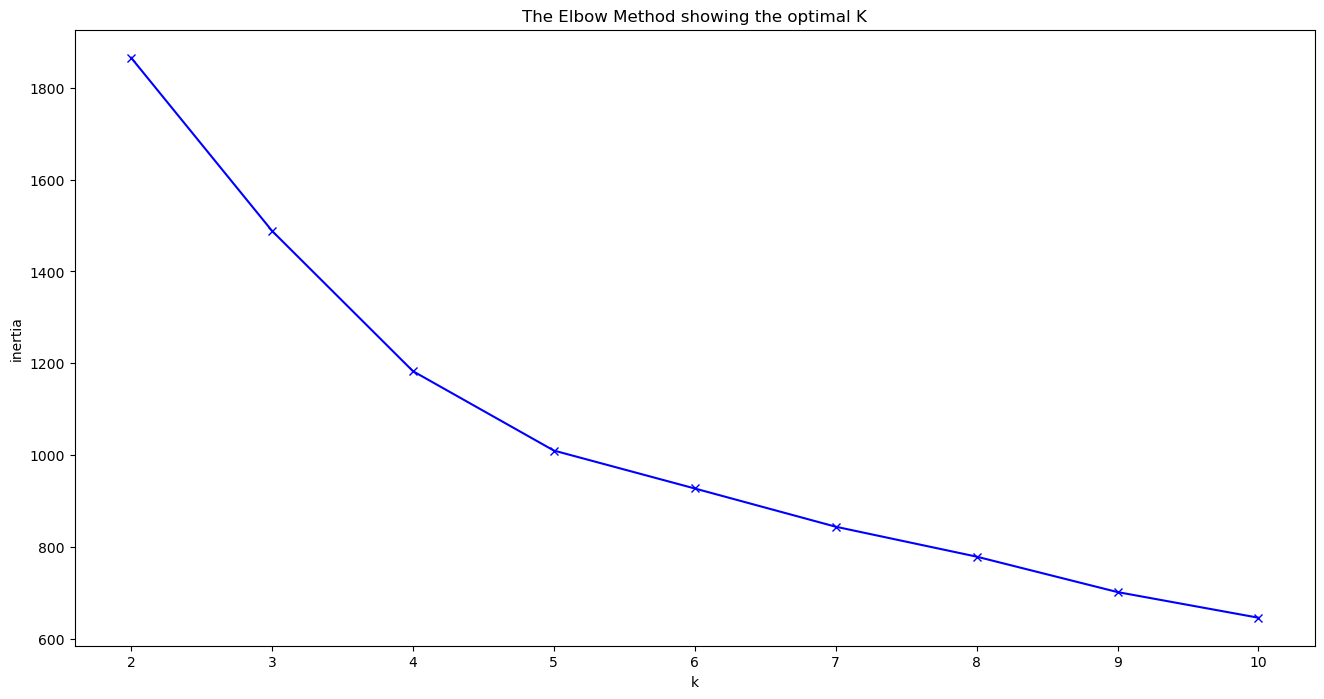

In [6]:
#Elbow Method
inertias = []
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

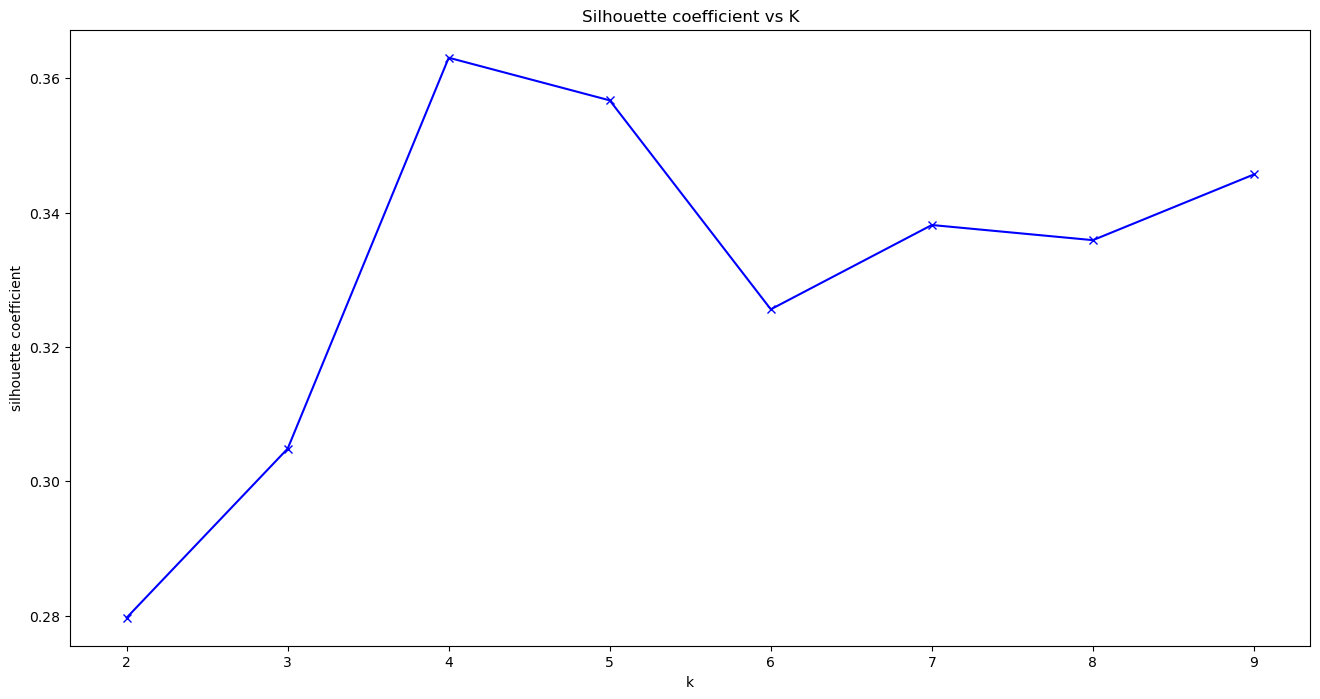

In [7]:
#Silhouette Method
from sklearn.metrics import silhouette_score

silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    label=kmeanModel.predict(df_scaled)
    silhouettes.append(silhouette_score(df_scaled,label))
    
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

4 or 5 clusters is probably best.

In [8]:
#Kmeans with 4 clusters
model = KMeans(4)
model.fit(df_scaled)

#create a df with the original data but with the assigned cluster label
df_with_clusters = df.copy()
df_with_clusters['label'] = model.predict(df_scaled)
df_with_clusters.head()

,total_bill,tip,sex,smoker,day,time,size,label
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [9]:
df_with_clusters['label'].value_counts()

1    87
0    76
2    62
3    19
Name: label, dtype: int64

## 2. Perform PCA to visualize clusters in 2D
So we have 4 clusters, but how can I visualize them? We have >2 dimensions (10 after encoding). Let's "transform" those 10 columns into just 2 columns using PCA.

In [10]:
pca = PCA(n_components=2).set_output(transform="pandas")
df_pca = pca.fit_transform(df_scaled) #enconded and scaled data (that was passed into clustering algo)
df_pca.head()

,pca0,pca1
0,-0.239351,-0.638569
1,0.430266,-0.351240
2,1.362435,0.577978
3,1.084152,0.197888
4,1.444831,1.245394


Great, let's now create a scatter plot using these two PC's, and let's have color represent the cluster labels.

In [11]:
df_pca_with_clusters = df_pca.copy()
df_pca_with_clusters['label'] = df_with_clusters['label']
df_pca_with_clusters.head()

,pca0,pca1,label
0,-0.239351,-0.638569,0
1,0.430266,-0.351240,0
2,1.362435,0.577978,0
3,1.084152,0.197888,0
4,1.444831,1.245394,0


In [12]:
#to visualize centroids in PCA space, we also need to transform them.
pca_centroids = pca.transform(model.cluster_centers_)
pca_centroids

,pca0,pca1
0,1.166088,0.361432
1,0.678782,-1.110642
2,-2.116432,1.417945
3,-0.866210,-0.987138


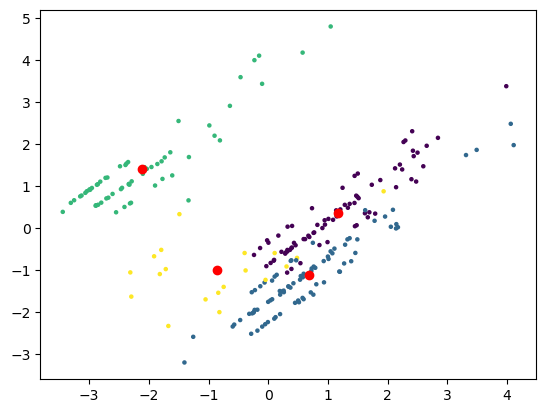

In [13]:
plt.scatter(df_pca_with_clusters['pca0'], df_pca_with_clusters['pca1'], c=df_pca_with_clusters['label'], s=5)
plt.scatter(pca_centroids['pca0'], pca_centroids['pca1'], c='red')

We can now see some clustered data! However, this is hard to interpret--this is one of the downsides to PCA. We get these two new variables, but we don't really know what they mean/represent. Best we can do is look at each of the PCA's components to try and determine what is important to each PCA. Radar 

In [14]:
#reprint encoded and scaled data
df_scaled.head()

,total_bill,tip,size,day_Thur,day_Fri,day_Sat,day_Sun,sex_Female,smoker_No,time_Dinner
0,-0.314711,-1.439947,-0.600193,-0.58366,-0.290593,-0.744406,1.486784,1.343353,0.784789,0.621582
1,-1.063235,-0.969205,0.453383,-0.58366,-0.290593,-0.744406,1.486784,-0.744406,0.784789,0.621582
2,0.137780,0.363356,0.453383,-0.58366,-0.290593,-0.744406,1.486784,-0.744406,0.784789,0.621582
3,0.438315,0.225754,-0.600193,-0.58366,-0.290593,-0.744406,1.486784,-0.744406,0.784789,0.621582
4,0.540745,0.443020,1.506958,-0.58366,-0.290593,-0.744406,1.486784,1.343353,0.784789,0.621582


In [15]:
#these are the coefficients used for each PC (in the linear combination calculation).
pca.components_

array([[ 0.39258641,  0.34570026,  0.33096824, -0.45635997, -0.09299332,
         0.18667386,  0.28975211, -0.21652021, -0.01826876,  0.48362891],
       [ 0.35622362,  0.3762588 ,  0.41323444,  0.41252462, -0.14298606,
        -0.41211085,  0.12117396,  0.02803133,  0.21559217, -0.37197519]])

If we want interpretability, we can use the mean (encoded) attributes of each cluster.

In [16]:
df_encoded.head()

,total_bill,tip,size,day_Thur,day_Fri,day_Sat,day_Sun,sex_Female,smoker_No,time_Dinner
0,16.99,1.01,2,0,0,0,1,1,1,1
1,10.34,1.66,3,0,0,0,1,0,1,1
2,21.01,3.50,3,0,0,0,1,0,1,1
3,23.68,3.31,2,0,0,0,1,0,1,1
4,24.59,3.61,4,0,0,0,1,1,1,1


In [17]:
cluster_0_means = df_encoded[df_with_clusters['label']==0].mean()
cluster_1_means = df_encoded[df_with_clusters['label']==1].mean()
cluster_2_means = df_encoded[df_with_clusters['label']==2].mean()
cluster_3_means = df_encoded[df_with_clusters['label']==3].mean()

means = pd.DataFrame([cluster_0_means, cluster_1_means, cluster_2_means, cluster_3_means])
means

,total_bill,tip,size,day_Thur,day_Fri,day_Sat,day_Sun,sex_Female,smoker_No,time_Dinner
0,21.410000,3.255132,2.842105,0.0,0.0,0.0,1.0,0.236842,0.750000,1.000000
1,20.441379,2.993103,2.517241,0.0,0.0,1.0,0.0,0.321839,0.517241,1.000000
2,17.682742,2.771452,2.451613,1.0,0.0,0.0,0.0,0.516129,0.725806,0.016129
3,17.151579,2.734737,2.105263,0.0,1.0,0.0,0.0,0.473684,0.210526,0.631579


In [18]:
df_with_clusters

,total_bill,tip,sex,smoker,day,time,size,label
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [19]:
df_encoded

,total_bill,tip,size,day_Thur,day_Fri,day_Sat,day_Sun,sex_Female,smoker_No,time_Dinner
0,16.99,1.01,2,0,0,0,1,1,1,1
1,10.34,1.66,3,0,0,0,1,0,1,1
2,21.01,3.50,3,0,0,0,1,0,1,1
3,23.68,3.31,2,0,0,0,1,0,1,1
4,24.59,3.61,4,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,0,1,0,0,1,1
240,27.18,2.00,2,0,0,1,0,1,0,1
241,22.67,2.00,2,0,0,1,0,0,0,1
242,17.82,1.75,2,0,0,1,0,0,1,1


Note: we can visualize the above in a [Radar Chart](https://towardsdatascience.com/how-to-create-a-radar-chart-in-python-36b9ebaa7a64).

Looks like it really just clustered on the variable `day`. Oh well, this is why clustering can be bad when we have categorical variables--they usually overpower any numerical varibles since categorical variables are naturally "clustered".

Bonus: if we want numerical values to have more of an effect, we could try scaling in a way such that numerical features are of larger magnitudes than categorical variables--this way they have more of an effect on the clustering.